# Aggregations: Min, Max, and Everything In Between

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >

Often when faced with a large amount of data, a first step is to `compute summary statistics` for the data in question.

- The most common summary statistics are the `mean` and `standard deviation`, 
    - which allow you to summarize the "typical" values in a dataset, 
- The other aggregates are useful as well
    - `sum`, `minimum`, `maximum`, `median`, `quantiles`, etc.

NumPy has fast built-in aggregation functions for working on arrays; 
- we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.

Python itself can do this using the built-in ``sum`` function:

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)
sum(L)

45.853836839108673

NumPy's ``sum`` function

In [3]:
np.sum(L)

55.612091166049424

It executes the operation in compiled code, 
- NumPy's version of the operation is computed much more quickly:

In [3]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

72.9 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
330 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Be careful:
The ``sum`` function and the ``np.sum`` function are not identical
- In particular, their optional arguments have different meanings
- ``np.sum`` is aware of multiple array dimensions

as we will see in the following section.

## Minimum and Maximum

- Similarly, Python has built-in ``min`` and ``max`` functions
- NumPy's corresponding functions have similar syntax, 
    - and again operate much more quickly:

In [4]:
min(big_array), max(big_array)

(1.1436470581660529e-06, 0.99999882844989307)

In [5]:
np.min(big_array), np.max(big_array)

(1.1436470581660529e-06, 0.99999882844989307)

In [6]:
%timeit min(big_array)
%timeit np.min(big_array)

52.9 ms ± 721 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
291 µs ± 9.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use `methods of the array object` itself:

In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

1.17171281366e-06 0.999997678497 499911.628197


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

One common type of aggregation operation is an `aggregate along a row or column`.

Say you have some data stored in a two-dimensional array:

In [7]:
M = np.random.random((3, 4))
print(M)

[[ 0.46848747  0.48321975  0.54905699  0.5605623 ]
 [ 0.54107581  0.40151732  0.08409495  0.14199213]
 [ 0.37921642  0.45497127  0.02486316  0.62415282]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [10]:
M.sum()

6.0850555667307118

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. 

- we can find the minimum value within each <u>**column**</u> by specifying ``axis=0``:
- we can find the maximum value within each <u>**row**</u> by specifying ``axis=1``:

The way the axis is specified here can be confusing to users coming from other languages.
> The ``axis`` keyword specifies the *dimension of the array that will be collapsed*


    data =[[a00, a01, a02, a03],
           [a10, a11, a12, a13],
           [a20, a21, a22, a23]]]
           
So specifying ``axis=0`` means that the first axis will be collapsed: 
- for two-dimensional arrays, this means that values within each column will be aggregated.
    - a00, a10, a20
    - a01, a11, a21
    - a02, a12, a22
    - a03, a13, a23

In [11]:
M.min(axis=0)

array([ 0.66859307,  0.03783739,  0.19544769,  0.06682827])

The function returns four values, corresponding to the four columns of numbers.

In [12]:
M.max(axis=1)

array([ 0.8967576 ,  0.99196818,  0.6687194 ])

### Other aggregation functions

Most aggregates have a <u>``NaN``-safe counterpart</u> that computes the result while ignoring missing values, 

- which are marked by the special IEEE floating-point ``NaN`` value 
    - for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)
    

### Other aggregation functions

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |


## Example

# What is the Average Height of US Presidents?

This data is available in the file *president_heights.csv*, 
- which is a simple comma-separated list of labels and values:

Linux Utilities http://man.linuxde.net/head

In [9]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


We'll use the **Pandas** package to read the file and extract this information.
- which we'll explore more fully in [Chapter 3](03.00-Introduction-to-Pandas.ipynb), 

note that the heights are measured in centimeters.

In [12]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
data.head(4)

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163


In [13]:
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics:

In [15]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.738095238
Standard deviation: 6.93184344275
Minimum height:     163
Maximum height:     193


Note that the aggregation operation reduced the entire array to a single summarizing value, 
- which gives us information about the **distribution** of values.

We may also wish to compute quantiles:

In [20]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("50th percentile:   ", np.percentile(heights, 50))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
50th percentile:    182.0
75th percentile:    183.0


> Median is defined as the 50th percentile. 

We see that the median height of US presidents is 182 cm, or just shy of six feet.


Of course, sometimes it's more useful to see a visual representation of this data, 
- which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)). 

For example, this code generates the following chart:

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set()  # set plot style

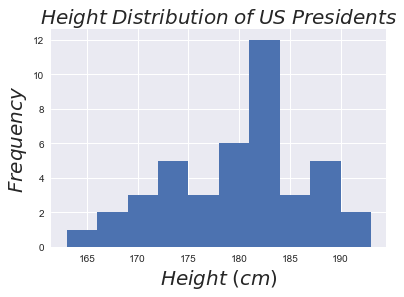

In [19]:
plt.hist(heights)
plt.title('$Height\; Distribution\; of \;US \;Presidents$', fontsize = 20)
plt.xlabel('$Height \;(cm)$', fontsize = 20)
plt.ylabel('$Frequency$', fontsize = 20);

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.

<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >